In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

### Загрузка данных

In [2]:
users_train = pd.read_csv('../input/mf-accelerator/contest_train.csv')
users_test = pd.read_csv('../input/mf-accelerator/contest_test.csv')

In [3]:
users_train.info()
users_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Columns: 262 entries, ID to FEATURE_259
dtypes: float64(260), int64(1), object(1)
memory usage: 49.0+ MB


,ID,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,...,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,0d1c880d23ff018,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-114.527812,...,39.0,2.0,223.118594,290.015143,1.0,1.0,0.0,1.0,2.0,2.0
1,1579ba37fd82c1f,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,329.828334,...,25.0,82.0,479.616045,611.651594,0.0,1.0,0.0,1.0,1.0,1.0
2,790086f721c7f5e,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.427338,...,119.0,0.0,352.268014,564.573421,1.0,1.0,0.0,1.0,1.0,1.0
3,b0a2078cf33c226,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,23.621397,...,1.0,0.0,410.524985,421.653876,1.0,0.0,0.0,1.0,2.0,2.0
4,d0c46717b9cb323,0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,677.745861,...,21.0,0.0,439.171356,476.189288,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
users_test.info()
users_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Columns: 261 entries, ID to FEATURE_259
dtypes: float64(260), object(1)
memory usage: 18.9+ MB


,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,...,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,0749d313171551f,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-46.950807,-45.018511,...,0.0,0.0,190.587701,162.047775,1.0,0.0,1.0,1.0,1.0,1.0
1,ddb093edbbbe1ef,0.0,0.0,1.0,0.0,0.0,0.0,0.0,343.627489,NaN,...,5.0,109.0,594.572663,685.500149,1.0,1.0,0.0,1.0,1.0,2.0
2,cef8538a6054069,0.0,0.0,0.0,0.0,1.0,0.0,0.0,909.178045,3260.445427,...,0.0,297.0,10.214396,300.397949,0.0,0.0,0.0,1.0,1.0,1.0
3,780e061918507d4,6.0,2.0,0.0,0.0,0.0,0.0,0.0,-4.499021,-93.374738,...,1.0,2.0,334.873280,363.739214,1.0,1.0,1.0,2.0,2.0,1.0
4,bb7e0f377a5bb14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-23.189787,-35.810318,...,83.0,136.0,551.413748,769.830050,1.0,1.0,0.0,1.0,1.0,1.0


### Исследование пропущенных значений

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns

In [6]:
# Missing values statistics
missing_values = missing_values_table(users_train)
missing_values.head(15)

Your selected dataframe has 262 columns.
There are 53 columns that have missing values.


,Missing Values,% of Total Values
FEATURE_189,24196,98.7
FEATURE_194,17245,70.3
FEATURE_190,17192,70.1
FEATURE_191,15309,62.4
FEATURE_192,13060,53.3
FEATURE_193,12596,51.4
FEATURE_187,11878,48.4
FEATURE_71,2960,12.1
FEATURE_73,2960,12.1
FEATURE_195,2787,11.4


В 53 признаках имеются пропуски. Возможно стоит удалить признаки, в которых  пропущено более 50% значений. Необходимо проверить насколько они нам полезны. Пока же оставим все колонки. 

### Исследование баланса целевого признака

In [7]:
users_train['TARGET'].value_counts(normalize=True)

0    0.708454
1    0.230415
2    0.061131
Name: TARGET, dtype: float64

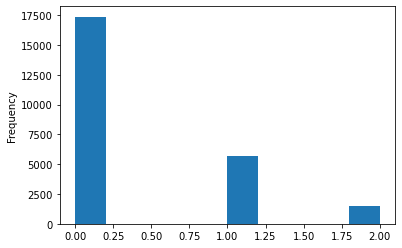

In [8]:
users_train['TARGET'].astype(int).plot.hist()

Наблюдается дисбаланс классов. Меньше всего абонентов 2-го сегмента (менее 1%). Более 70% абонентов из 0-го сегмента. 

### Корреляция признаков

Проверим корреляция характеристик с целевым признаком.
- .00-.19 “очень слабая”
- .20-.39 “слабая”
- .40-.59 “умеренная”
- .60-.79 “сильная”
- .80-1.0 “очень сильная”

In [9]:
correlations = users_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FEATURE_200    0.107676
FEATURE_184    0.107676
FEATURE_199    0.120759
FEATURE_198    0.123480
FEATURE_76     0.134538
FEATURE_197    0.148219
FEATURE_206    0.176311
FEATURE_254    0.178763
FEATURE_203    0.181661
FEATURE_74     0.183590
TARGET         1.000000
FEATURE_3           NaN
FEATURE_144         NaN
FEATURE_249         NaN
FEATURE_256         NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 FEATURE_69    -0.253393
FEATURE_170   -0.234392
FEATURE_180   -0.210143
FEATURE_80    -0.161007
FEATURE_112   -0.141764
FEATURE_162   -0.139107
FEATURE_252   -0.137007
FEATURE_121   -0.134718
FEATURE_81    -0.133126
FEATURE_253   -0.127700
FEATURE_83    -0.126291
FEATURE_240   -0.125530
FEATURE_237   -0.123406
FEATURE_113   -0.122909
FEATURE_65    -0.122853
Name: TARGET, dtype: float64


### Предобработка признаков

Удалим признаки, в которых более 48% пропусков, т.к. с ними наш целевой признак не коррелирует.

In [10]:
miss_val_list_drop = missing_values[missing_values['% of Total Values']>48].index
miss_val_list_drop

Index(['FEATURE_189', 'FEATURE_194', 'FEATURE_190', 'FEATURE_191',
       'FEATURE_192', 'FEATURE_193', 'FEATURE_187'],
      dtype='object')

In [11]:
train = users_train.drop(list(miss_val_list_drop), axis=1)
test = users_test.drop(list(miss_val_list_drop), axis=1)

### Заполнение пропусков (медианой) и масштабирование признаков

In [12]:
train = train.fillna(train.median())
test = test.fillna(train.median())

In [13]:
target = train['TARGET']
features = train.drop(['TARGET','ID'] , axis=1)
features_test = test.drop(['ID'] , axis=1)

# Разбиваем датасет на 2 выборки (80%:20%).
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345)

print(f'Размер обучающей выборки: {len(target_train)}, баланс классов {target_train.mean():.2f}')
print(target_train.value_counts(normalize=True))

print(f'Размер тестовой выборки: {len(target_valid)}, баланс классов {target_valid.mean():.2f}')
print(target_valid.value_counts(normalize=True))

Размер обучающей выборки: 19616, баланс классов 0.35
0    0.708503
1    0.230577
2    0.060920
Name: TARGET, dtype: float64
Размер тестовой выборки: 4905, баланс классов 0.35
0    0.708257
1    0.229766
2    0.061978
Name: TARGET, dtype: float64


In [14]:
# Переводим численные признаки к одному масштабу
numeric = features_train.columns

scaler = MinMaxScaler(feature_range = (0, 1))

features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Борьба с дисбалансом. Увеличение выборки (upsampling)

In [15]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
features_two = features_train[target_train == 2]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
target_two = target_train[target_train == 2]

print(features_zeros.shape)
print(features_ones.shape)
print(features_two.shape)

(13898, 253)
(4523, 253)
(1195, 253)


In [16]:
def upsample(features, target, repeat1, repeat2):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    features_two = features[target == 2]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    target_two = target[target == 2]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat1 + [features_two] * repeat2)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat1 + [target_two] * repeat2)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

# Новые признаки и целевой признак по увеличенной выборке
features_upsampled, target_upsampled = upsample(features_train, target_train, 3, 11)
print(features_upsampled.shape)
print(target_upsampled.shape)

(40612, 253)
(40612,)


### Модель CatBoost

Параметры модели были подобраны экспериментально таким образом, чтобы значение метрики F1_Macro было максимально.

In [17]:
from catboost import CatBoostClassifier

best_model = CatBoostClassifier(
    loss_function='MultiClass',
    classes_count= 3,
    iterations=3655,
    max_leaves=31,
    depth=6,
    learning_rate = 0.02,
    random_seed=63,
    od_type='Iter',
    od_wait=100,
    custom_loss=['TotalF1:average=Macro', 'Accuracy'],
    use_best_model=True
)

In [18]:
%time
best_model.fit(
   features_upsampled, target_upsampled,
   eval_set=(features_valid, target_valid),
   logging_level='Silent',
   plot=True
)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

                                  ----- TotalF1:average=Macro ----- 
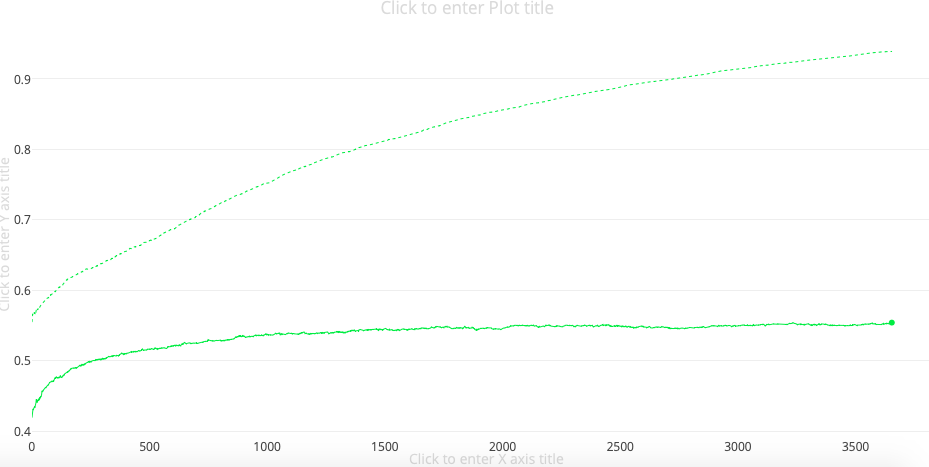

In [19]:
predict_valid = best_model.predict(features_valid)
predictions = []

for x in predict_valid:
    predictions.append(x[0])   
    
f1_valid = f1_score(predictions, target_valid, average='macro')
  
print('f1_valid: ', f1_valid)
print("Accuracy_valid:", accuracy_score(target_valid, predictions))
print(f'Баланс классов в предсказании {pd.Series(predictions).mean():.2f}')

f1_valid:  0.5533311318359567
Accuracy_valid: 0.6691131498470948
Баланс классов в предсказании 0.43


### Матрица ошибок

In [20]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

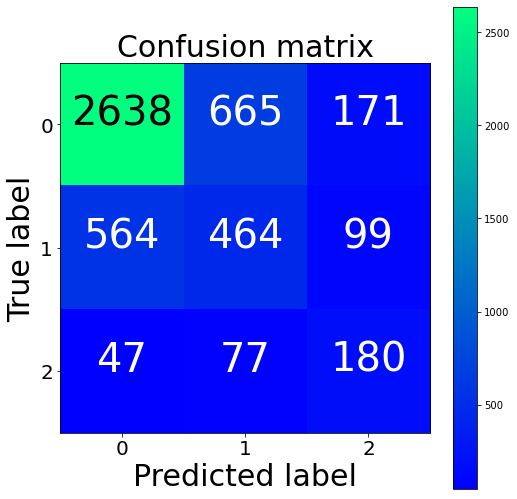

[[2638  665  171]
 [ 564  464   99]
 [  47   77  180]]


In [21]:
cm = confusion_matrix(target_valid, predictions)
fig = plt.figure(figsize=(7, 7))
plot = plot_confusion_matrix(cm, classes=[0,1,2], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

Видим, что наша модель хорошо предсказывает абонентов 0-го сегмента и неплохо определяет 2-й сегмент, хуже всего определяет абонентов 1-го сегмента.

### Feature importance

Text(0.5, 0, 'Relative Importance')

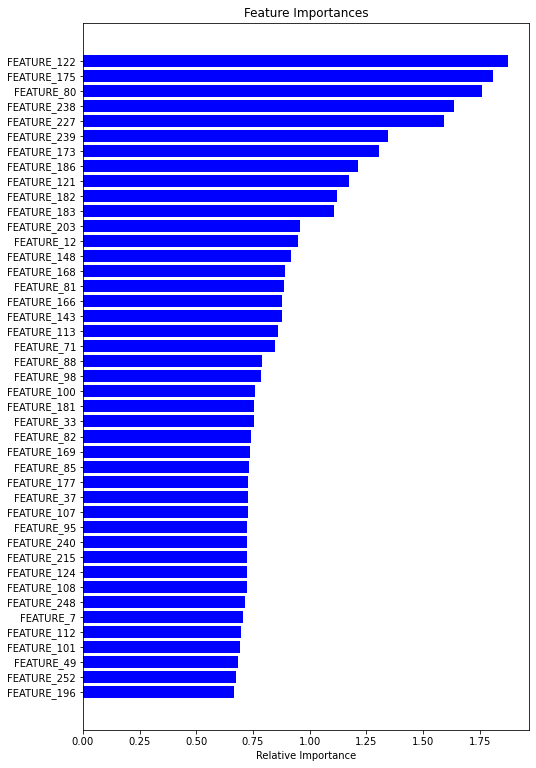

In [22]:
features=features_train.columns
importances = best_model.get_feature_importance()
indices = np.argsort(importances)[210:]

plt.figure(figsize=(8,13))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [23]:
# выделим наименее значимые признаки
#notimportant_features = features[indices[importances[indices]<0.001]] 
#notimportant_features

In [24]:
#features_test = test.drop(['ID'] , axis=1)
#features_test[numeric] = scaler.transform(test[numeric])

### Проверка на тестовой выборке

In [25]:
predict_test = best_model.predict(features_test)
predictions_test = []

for x in predict_test:
    predictions_test.append(x[0]) 

In [26]:
# Make the submission dataframe
submission = pd.DataFrame({'ID': users_test['ID'], 'Predicted': predictions_test})    

In [27]:
submission.to_csv('submission.csv', index = False)